<a href="https://colab.research.google.com/github/Devikasatheesh12/ML-Project/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HOTEL** **RESERVATION** **STATUS** **PREDICTION**

In the dynamic landscape of hotel management,the ability to accurately predict reservation outcomes holds immense value.
This project is dedicated to forecasting whether a hotel reservation will be cancelled or remain intact.Harnessing the
power of data driven insights and predictive modeling,this initiative aims to empower hoteliers with the foresight to
optimize their operations.
By analyzing historical patterns and employing sophisticated algorithms,this project seeks to enhance decision making
processes,minimize revenue loss due to cancellations,and elevate overall booking management efficiency.

*Introduction*

*Importing* *necessary* *modules*

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import  accuracy_score,classification_report,ConfusionMatrixDisplay,roc_curve,auc

*Importing* *dataset*

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/dataset/Hotel Reservations.csv")
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


*checking* *for* *missing* *values*

In [ ]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

***EXPLORATORY*** ***DATA*** ***ANALYSIS***

*Pie* *Plot*

In [ ]:
df['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

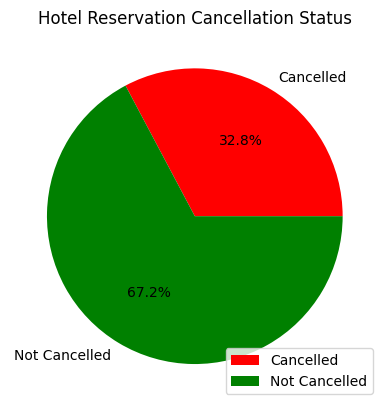

In [ ]:
import matplotlib.pyplot as plt
cancelled_count=11885
not_cancelled_count=24390
lbl=['Cancelled','Not Cancelled']
sizes=[cancelled_count,not_cancelled_count]
colors=['red','green']
plt.pie(sizes,labels=lbl,colors=colors,autopct='%1.1f%%')
plt.title("Hotel Reservation Cancellation Status")
plt.legend(loc='lower right')
plt.show()

from the above graph we can conclude that not cancellation is more than cancellation

*Bar* *Plot*

In [ ]:
df['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

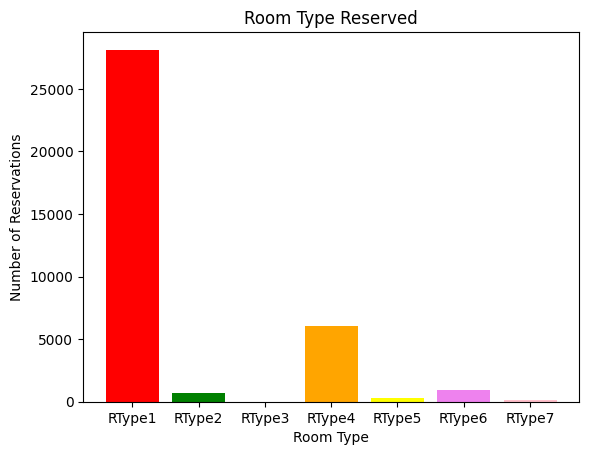

In [ ]:
categories=['RType1','RType2','RType3','RType4','RType5','RType6','RType7']
counts=[28130,692,7,6057,265,966,158]
plt.bar(categories,counts,color=['red','green','blue','orange','yellow','violet','pink'])
plt.xlabel('Room Type')
plt.ylabel('Number of Reservations')
plt.title('Room Type Reserved')
plt.show()

from the bar plot we can conclude that room type 1 is the most booked room type

*Count* *Plot*

<Axes: xlabel='type_of_meal_plan', ylabel='count'>

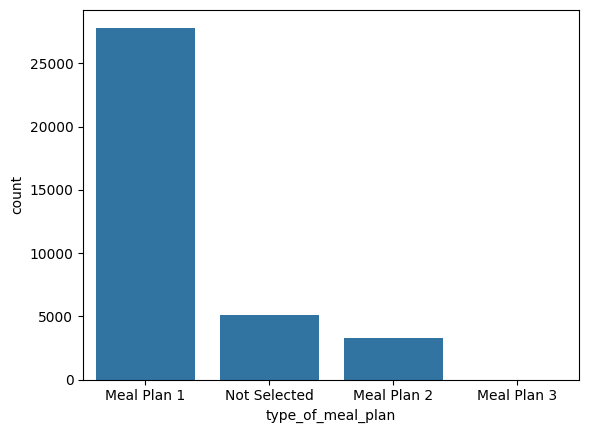

In [ ]:
import seaborn as sns
sns.countplot(x=df['type_of_meal_plan'])

from the countplot we can conclude that meal plan 1 is the most booked type of meal plan

*Checking* *the* *datatype*

In [ ]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

*LabelEncoding*

In [ ]:
le=LabelEncoder()
k=['Booking_ID','type_of_meal_plan','room_type_reserved','market_segment_type','booking_status']
for i in k:
  df[i]=le.fit_transform(df[i])
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,36270,3,0,2,6,0,0,3,85,2018,8,3,4,0,0,0,167.80,1,1
36271,36271,2,0,1,3,0,0,0,228,2018,10,17,4,0,0,0,90.95,2,0
36272,36272,2,0,2,6,0,0,0,148,2018,7,1,4,0,0,0,98.39,2,1
36273,36273,2,0,0,3,3,0,0,63,2018,4,21,4,0,0,0,94.50,0,0


In [ ]:
df.dtypes

Booking_ID                                int64
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

*Seperating* *input* *and* *output*

In [ ]:
X=df.iloc[:,:-1]
X

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0
1,1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1
2,2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0
3,3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0
4,4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,36270,3,0,2,6,0,0,3,85,2018,8,3,4,0,0,0,167.80,1
36271,36271,2,0,1,3,0,0,0,228,2018,10,17,4,0,0,0,90.95,2
36272,36272,2,0,2,6,0,0,0,148,2018,7,1,4,0,0,0,98.39,2
36273,36273,2,0,0,3,3,0,0,63,2018,4,21,4,0,0,0,94.50,0


In [ ]:
y=df.iloc[:,-1]
y

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 36275, dtype: int64

*Scaling*

In [ ]:
ss=StandardScaler()
X_scaled=ss.fit_transform(X)
X_scaled

array([[-1.73200306,  0.29889263, -0.26147045, ..., -0.08745646,
        -1.09503276, -0.78813999],
       [-1.73190756,  0.29889263, -0.26147045, ..., -0.08745646,
         0.09280591,  0.48376045],
       [-1.73181207, -1.62897546, -0.26147045, ..., -0.08745646,
        -1.2375278 , -0.78813999],
       ...,
       [ 1.73181207,  0.29889263, -0.26147045, ..., -0.08745646,
        -0.14345087,  1.75566089],
       [ 1.73190756,  0.29889263, -0.26147045, ..., -0.08745646,
        -0.25431201, -0.78813999],
       [ 1.73200306,  0.29889263, -0.26147045, ..., -0.08745646,
         1.65996637, -0.78813999]])

*Train* *Test* *Split*

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=5)

*Model* *Creation*,*testing* *performance* *of* *the* *model*

1. KNeighborsClassifier

accuracy score: 0.8428742074795552

classification report
               precision    recall  f1-score   support

           0       0.79      0.71      0.75      3540
           1       0.87      0.91      0.89      7343

    accuracy                           0.84     10883
   macro avg       0.83      0.81      0.82     10883
weighted avg       0.84      0.84      0.84     10883

confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7d7b8412b520>

2. SVC

accuracy score: 0.8396581824864467

classification report
               precision    recall  f1-score   support

           0       0.80      0.68      0.73      3540
           1       0.85      0.92      0.89      7343

    accuracy                           0.84     10883
   macro avg       0.83      0.80      0.81     10883
weighted avg       0.84      0.84      0.84     10883

confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object a

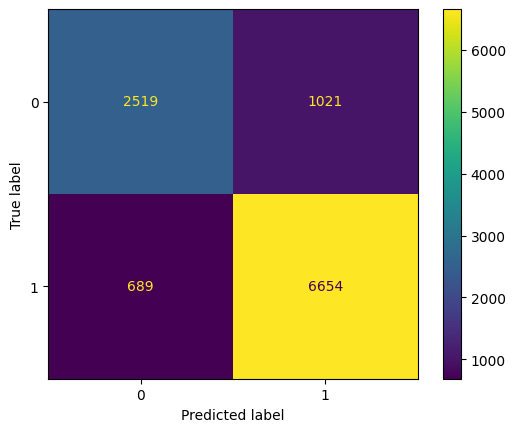

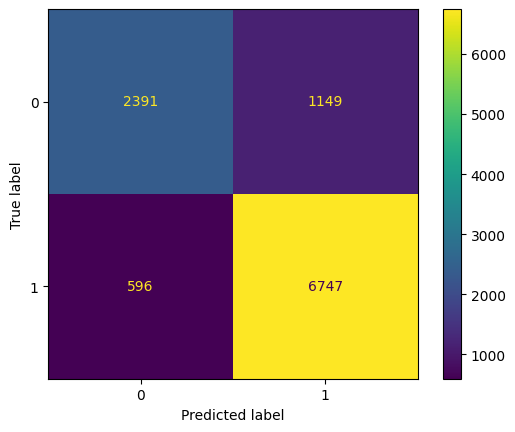

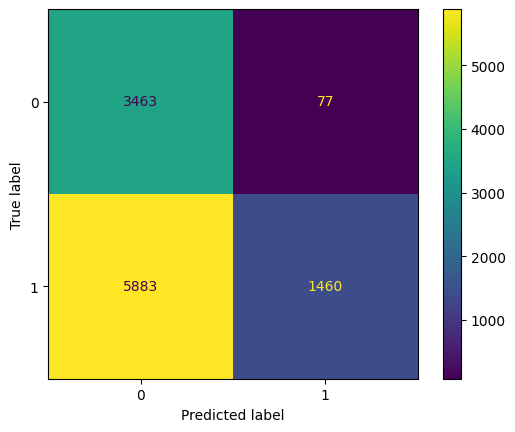

In [ ]:
print('1. KNeighborsClassifier')
print()
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
y_pred1=knn.predict(X_test)
print("accuracy score:",accuracy_score(y_test,y_pred1))
print("\nclassification report\n",classification_report(y_test,y_pred1))
print("confusion matrix",ConfusionMatrixDisplay.from_predictions(y_test,y_pred1))
print()

print('2. SVC')
print()
sv=SVC()
sv.fit(X_train,y_train)
y_pred2=sv.predict(X_test)
print("accuracy score:",accuracy_score(y_test,y_pred2))
print("\nclassification report\n",classification_report(y_test,y_pred2))
print("confusion matrix",ConfusionMatrixDisplay.from_predictions(y_test,y_pred2))
print()

print('3. Naive Bayes')
print()
nbs=GaussianNB()
nbs.fit(X_train,y_train)
y_pred3=nbs.predict(X_test)
print("accuracy score:",accuracy_score(y_test,y_pred3))
print("\nclassification report\n",classification_report(y_test,y_pred3))
print("confusion matrix",ConfusionMatrixDisplay.from_predictions(y_test,y_pred3))
print()

*Hyperparameter* *Tuning*-*KNeighborsClassifier*

In [ ]:
from sklearn.model_selection import GridSearchCV
params={'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],
        'algorithm':['auto','ball_tree','kd_tree','brute']}
clf=GridSearchCV(knn,params,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}


In [ ]:
knn1=KNeighborsClassifier(n_neighbors=9,weights='distance',algorithm='auto')
knn1.fit(X_train,y_train)
y_pred_new=knn1.predict(X_test)
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      3540
           1       0.88      0.91      0.89      7343

    accuracy                           0.85     10883
   macro avg       0.84      0.82      0.83     10883
weighted avg       0.85      0.85      0.85     10883



*ROC* *CURVE* *AND* *AUC*

roc_curve is used to plot the graph between false positive rate and true positive rate,and auc is used to compute the area under roc curve

<function matplotlib.pyplot.show(close=None, block=None)>

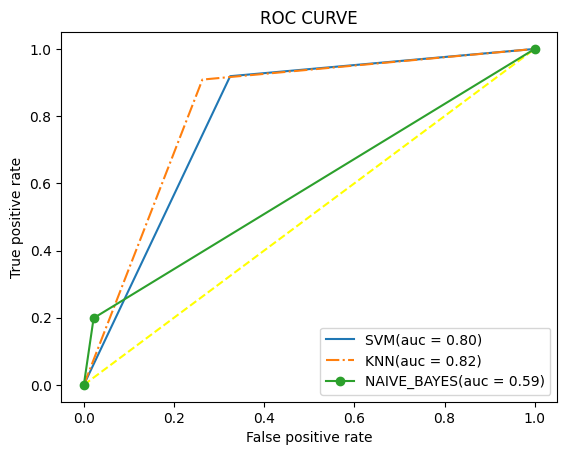

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc

svm_fpr,svm_tpr,threshold=roc_curve(y_test,y_pred2)
auc_svm=auc(svm_fpr,svm_tpr)

knn1_fpr,knn1_tpr,threshold=roc_curve(y_test,y_pred_new)
auc_knn1=auc(knn1_fpr,knn1_tpr)

nbs_fpr,nbs_tpr,threshold=roc_curve(y_test,y_pred3)
auc_nbs=auc(nbs_fpr,nbs_tpr)

plt.plot(svm_fpr,svm_tpr,linestyle='-',label='SVM(auc = %0.2f)'%auc_svm)
plt.plot([0,1],[0,1],color='yellow',linestyle='--')
plt.plot(knn1_fpr,knn1_tpr,linestyle='-.',label='KNN(auc = %0.2f)'%auc_knn1)
plt.plot(nbs_fpr,nbs_tpr,marker='o',label='NAIVE_BAYES(auc = %0.2f)'%auc_nbs)
plt.title('ROC CURVE')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show

*Decisiontree* *classifier*

In [ ]:
dt=DecisionTreeClassifier(criterion='gini',random_state=1,max_depth=5)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

4. DecisionTreeClassifier

classification_report
               precision    recall  f1-score   support

           0       0.78      0.69      0.73      3540
           1       0.86      0.91      0.88      7343

    accuracy                           0.83     10883
   macro avg       0.82      0.80      0.81     10883
weighted avg       0.83      0.83      0.83     10883



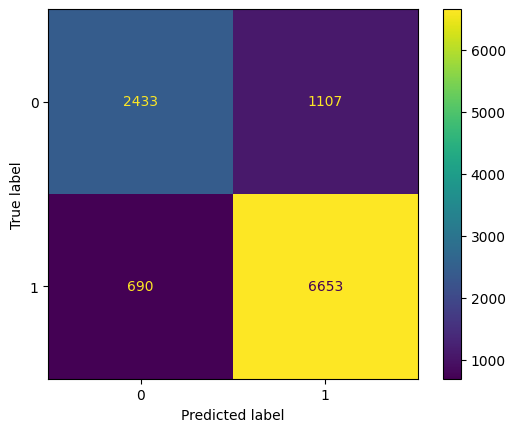

In [ ]:
print("4. DecisionTreeClassifier")
y_pred4=dt.predict(X_test)
print('\nclassification_report\n',classification_report(y_test,y_pred4))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred4))

*Hyperparameter* *Tuning*-*DecisonTreeClassifier*

In [ ]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[4,5,6,7,8]}
grid1=GridSearchCV(dt,params,cv=10,scoring='accuracy')
grid1.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
print(grid1.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'splitter': 'best'}


In [ ]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=8,splitter='best')
dt1.fit(X_train,y_train)
y_pred_dt=knn1.predict(X_test)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      3540
           1       0.88      0.91      0.89      7343

    accuracy                           0.85     10883
   macro avg       0.84      0.82      0.83     10883
weighted avg       0.85      0.85      0.85     10883



*ROC* *CURVE* *AND* *AUC*

<function matplotlib.pyplot.show(close=None, block=None)>

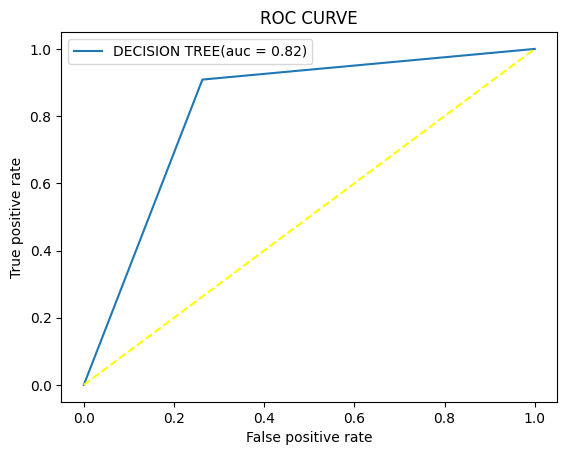

In [ ]:
dt1_fpr,dt1_tpr,threshold=roc_curve(y_test,y_pred_dt)
auc_dt1=auc(dt1_fpr,dt1_tpr)
plt.plot(dt1_fpr,dt1_tpr,linestyle='-',label='DECISION TREE(auc = %0.2f)'%auc_dt1)
plt.plot([0,1],[0,1],color='yellow',linestyle='--')
plt.title('ROC CURVE')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show

*Randomforestclassifier*,*Adaboost* *classifier*

5. RandomForestClassifier

classification_report
               precision    recall  f1-score   support

           0       0.86      0.71      0.78      3540
           1       0.87      0.94      0.91      7343

    accuracy                           0.87     10883
   macro avg       0.86      0.83      0.84     10883
weighted avg       0.87      0.87      0.86     10883


6. AdaboostClassifier

classification_report
               precision    recall  f1-score   support

           0       0.74      0.68      0.71      3540
           1       0.85      0.89      0.87      7343

    accuracy                           0.82     10883
   macro avg       0.80      0.78      0.79     10883
weighted avg       0.82      0.82      0.82     10883




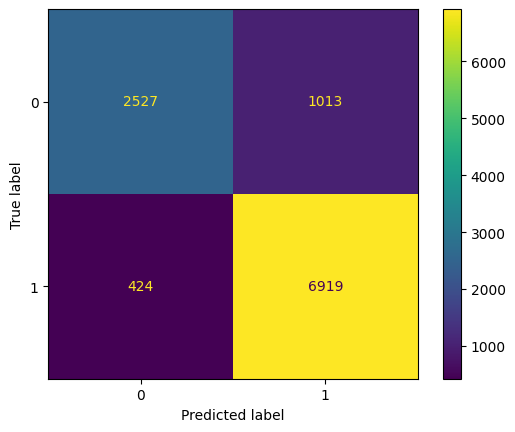

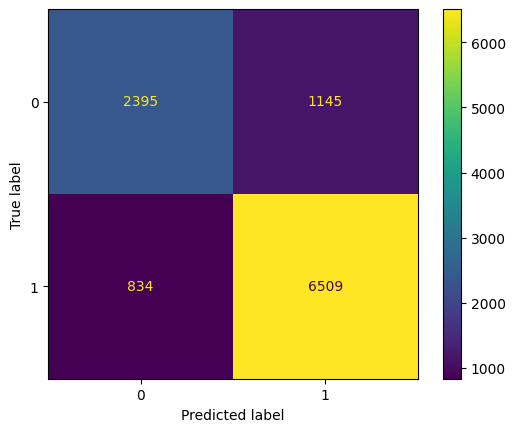

In [ ]:
print("5. RandomForestClassifier")
print()
rf=RandomForestClassifier(n_estimators=200,random_state=1,criterion='entropy',max_depth=9)
rf.fit(X_train,y_train)
y_pred5=rf.predict(X_test)
print('classification_report\n',classification_report(y_test,y_pred5))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred5))
print()

print("6. AdaboostClassifier")
print()
ad=AdaBoostClassifier(random_state=5)
ad.fit(X_train,y_train)
y_pred6=ad.predict(X_test)
print('classification_report\n',classification_report(y_test,y_pred6))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred6))
print()


*Hyperparameter* *Tuning*-*RandomForestClassifier*

In [ ]:
params={'n_estimators':[50,100,150,200],'max_features':['sqrt','log2'],'class_weight':['balanced','balanced_subsample'],'criterion':['gini','entropy']}
grid3=GridSearchCV(rf,params,cv=10,scoring='accuracy')
grid3.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=9,
                                              n_estimators=200,
                                              random_state=1),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [ ]:
print(grid3.best_params_)

{'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 50}


In [ ]:
rf1=RandomForestClassifier(class_weight='balanced_subsample',criterion='entropy',max_features='sqrt',n_estimators=50)
rf1.fit(X_train,y_train)
y_pred_rf=rf1.predict(X_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84      3540
           1       0.91      0.94      0.93      7343

    accuracy                           0.90     10883
   macro avg       0.89      0.87      0.88     10883
weighted avg       0.90      0.90      0.90     10883



*ROC* *CURVE* *AND* *AUC*

<function matplotlib.pyplot.show(close=None, block=None)>

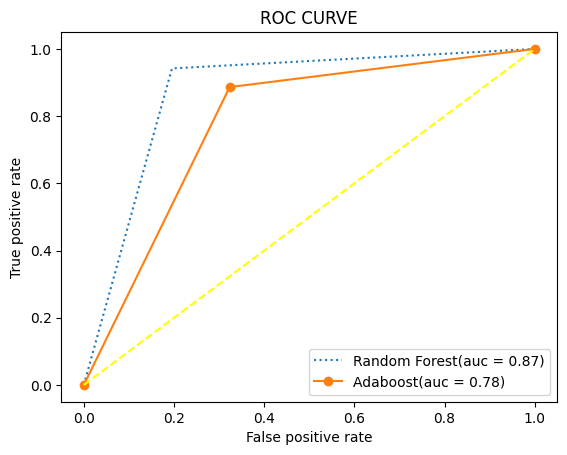

In [ ]:
rf1_fpr,rf1_tpr,threshold=roc_curve(y_test,y_pred_rf)
auc_rf1=auc(rf1_fpr,rf1_tpr)

ad_fpr,ad_tpr,threshold=roc_curve(y_test,y_pred6)
auc_ad=auc(ad_fpr,ad_tpr)


plt.plot(rf1_fpr,rf1_tpr,linestyle=':',label='Random Forest(auc = %0.2f)'%auc_rf1)
plt.plot(ad_fpr,ad_tpr,marker='o',label='Adaboost(auc = %0.2f)'%auc_ad)
plt.plot([0,1],[0,1],color='yellow',linestyle='--')
plt.title('ROC CURVE')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show

*XGBClassifier*

XGBClassifier
classification_report
               precision    recall  f1-score   support

           0       0.85      0.80      0.82      3540
           1       0.91      0.93      0.92      7343

    accuracy                           0.89     10883
   macro avg       0.88      0.87      0.87     10883
weighted avg       0.89      0.89      0.89     10883



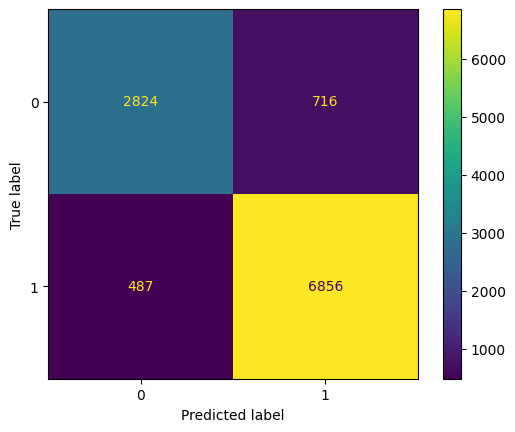

In [ ]:
print("XGBClassifier")
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred7=xgb.predict(X_test)
print('classification_report\n',classification_report(y_test,y_pred7))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred7))


*ROC* *CURVE* *AND* *AUC*

<function matplotlib.pyplot.show(close=None, block=None)>

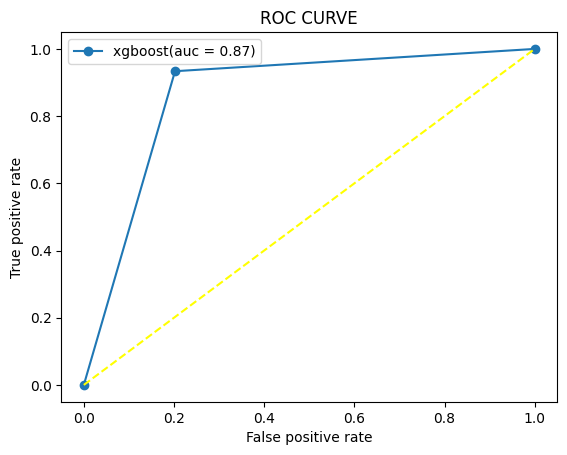

In [ ]:
xg_fpr,xg_tpr,threshold=roc_curve(y_test,y_pred7)
auc_xg=auc(xg_fpr,xg_tpr)
plt.plot(xg_fpr,xg_tpr,marker='o',label='xgboost(auc = %0.2f)'%auc_xg)
plt.plot([0,1],[0,1],color='yellow',linestyle='--')
plt.title('ROC CURVE')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show

*AUC* *Comparison*

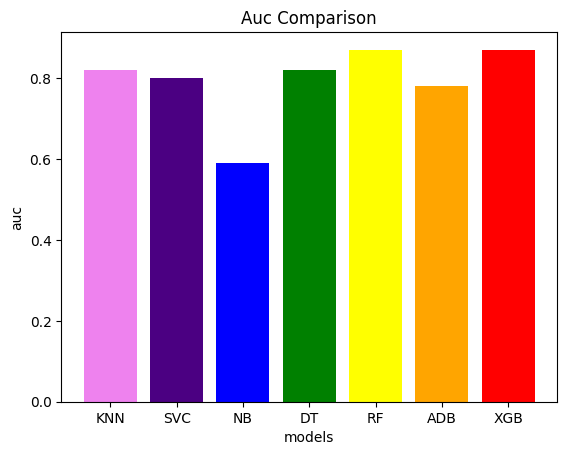

In [ ]:
models=['KNN','SVC','NB','DT','RF','ADB','XGB']
auc=[0.82,0.80,0.59,0.82,0.87,0.78,0.87]
plt.bar(models,auc,color=['violet','indigo','blue','green','yellow','orange','red'])
plt.xlabel('models')
plt.ylabel('auc')
plt.title("Auc Comparison")
plt.show()

***Accuracy*** ***Visualization***

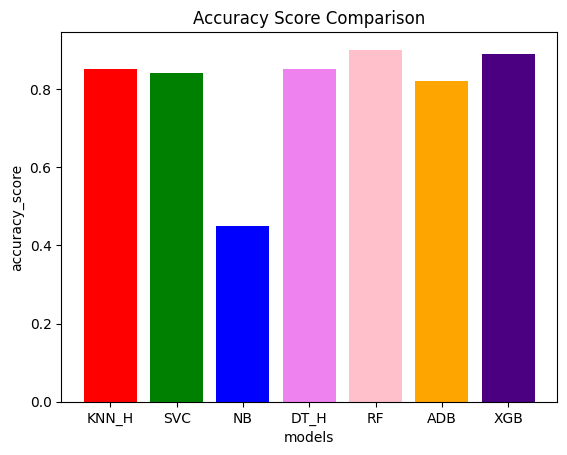

In [ ]:
import matplotlib.pyplot as plt
models=['KNN_H','SVC','NB','DT_H','RF','ADB','XGB']
accuracy_score=[0.85,0.84,0.45,0.85,0.90,0.82,0.89]
plt.bar(models,accuracy_score,color=['red','green','blue','violet','pink','orange','indigo'])
plt.xlabel('models')
plt.ylabel('accuracy_score')
plt.title("Accuracy Score Comparison")
plt.show()

from the accuracy score comparision we can see that accuracy score is more for RandomForestClassifier

In [ ]:
import pickle
filename='models.sav'
pickle.dump(rf1,open(filename,'wb'))

In [ ]:
pickle.dump(ss,open('scaler.sav','wb'))